In [31]:
import numpy as np
import keras
import csv
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define the model
def steering_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=(16,32,1)))	

    model.add(Convolution2D(8, 3, 3, init='normal',border_mode='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2),border_mode='valid'))

    model.add(Convolution2D(8, 3, 3,init='normal',border_mode='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2),border_mode='valid'))

    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(1))

    model.summary()
    return model


In [102]:
model = steering_model()

/home/sid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_initializer="normal", padding="valid")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 16, 32, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 30, 8)         80        
_________________________________________________________________
activation_4 (Activation)    (None, 14, 30, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 15, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 13, 8)          584       
_________________________________________________________________
activation_5 (Activation)    (None, 5, 13, 8)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 6, 8)           0         
__________

/home/sid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="valid")`
  
/home/sid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_initializer="normal", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/home/sid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="valid")`
  if sys.path[0] == '':


In [103]:
 model.load_weights('model.h5')

In [104]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 16, 32, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 30, 8)         80        
_________________________________________________________________
activation_4 (Activation)    (None, 14, 30, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 15, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 13, 8)          584       
_________________________________________________________________
activation_5 (Activation)    (None, 5, 13, 8)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 6, 8)           0         
__________

In [105]:
model.layers

In [72]:
model.layers[1].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'filters': 8,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'RandomNormal',
  'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_1',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

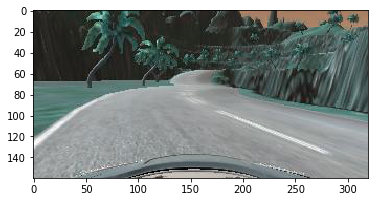

In [91]:
import cv2
img = cv2.imread('images/IMG/center_2017_10_05_16_43_08_769.jpg')
plt.imshow(img)
transformed_image_array = img[None, :, :, :]
# resize the image
img = (cv2.resize((cv2.cvtColor(transformed_image_array[0], cv2.COLOR_RGB2HSV))[:, :, 1], (32, 16))).reshape(1, 16, 32, 1)

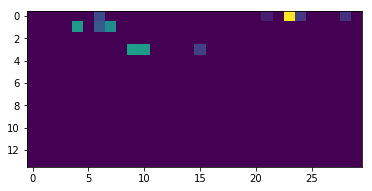

In [190]:
a = out[:,:,5]
# a = a/np.sum(a,axis=1)[:,None]  # Normalize
plt.imshow(a)

In [48]:
con1 = Model(inputs=model.input, outputs=model.get_layer(index=2).output)
con1.predict(img).shape

(1, 14, 30, 8)

In [52]:
for my_layer in model.layers:
    con3 = Model(inputs=model.input, outputs=my_layer.output)
    print(con3.predict(img).shape)

(1, 16, 32, 1)
(1, 14, 30, 8)
(1, 14, 30, 8)
(1, 7, 15, 8)
(1, 5, 13, 8)
(1, 5, 13, 8)
(1, 2, 6, 8)
(1, 2, 6, 8)
(1, 96)
(1, 50)
(1, 50)
(1, 1)


In [180]:
con3 = Model(inputs=model.input, outputs=model.get_layer(index=3).output)
out = con3.predict(img)[0]
print(out.shape)

(14, 30, 8)


In [181]:
a = out[:,:,1]

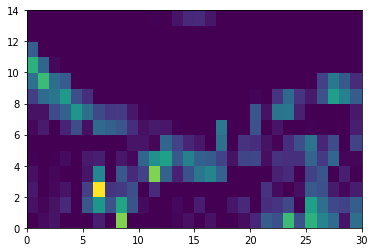

In [182]:
a = out[:,:,4]
# a = a/np.sum(a,axis=1)[:,None]  # Normalize
plt.pcolor(a)

In [133]:
lay = model.layers[1]

In [188]:
b = lay.get_weights()[0][:,:,0,1]
# b = b/np.sum(b,axis=1)[:,None]  # Normalize
# plt.pcolor(b)
b

array([[ 0.05364612, -0.01350761,  0.00716234],
       [-0.12509401, -0.14123271, -0.1555644 ],
       [ 0.15959504,  0.1497826 ,  0.1307579 ]], dtype=float32)